# Bone Fracture Classification Project

This notebook is designed for an AI course project to classify bone fractures from X-ray images. We will implement and compare four different machine learning and deep learning models:
1. **CNN (Convolutional Neural Network)**: Best for image data.
2. **ANN (Artificial Neural Network)**: A standard deep learning approach.
3. **SVM (Support Vector Machine)**: A classical machine learning classifier.
4. **Random Forest**: An ensemble learning method.

### Project Structure:
- Data Loading and Preprocessing
- Model 1: CNN
- Model 2: ANN
- Model 3: SVM
- Model 4: Random Forest
- Comparison of Results

## 1. Import Libraries and Setup

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size for all models
IMG_SIZE = 128
BATCH_SIZE = 32

## 2. Data Loading and Preprocessing

We will load the images from the dataset folders and resize them to a standard size (128x128).

In [10]:
def load_data(data_dir):
    images = []
    labels = []
    categories = ['not_fractured', 'fractured']
    
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        
        # Limit images for classical models to save memory/time if needed
        # For this project, we'll try to load all
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(new_array)
                labels.append(class_num)
            except Exception as e:
                pass
    
    return np.array(images), np.array(labels)

# Paths to the dataset
train_dir = 'C:\\Users\\DELL 5540\\Desktop\\AI Project\\BoneFractureDataset\\training'
test_dir = 'C:\\Users\\DELL 5540\\Desktop\\AI Project\\BoneFractureDataset\\testing'

print("Loading training data...")
X_train, y_train = load_data(train_dir)
print("Loading testing data...")
X_test, y_test = load_data(test_dir)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Loading training data...
Loading testing data...
Training samples: 7091
Testing samples: 600


## 3. Model 1: CNN (Convolutional Neural Network)

CNNs are the gold standard for image classification because they can learn spatial hierarchies of features.

In [11]:
# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_cnn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training CNN...")
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_split=0.1, batch_size=BATCH_SIZE)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

Training CNN...


C:\Users\DELL 5540\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 351ms/step - accuracy: 0.7540 - loss: 0.4978 - val_accuracy: 0.6338 - val_loss: 0.8590
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 69s 343ms/step - accuracy: 0.9248 - loss: 0.1949 - val_accuracy: 0.7268 - val_loss: 1.3494
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 72s 359ms/step - accuracy: 0.9814 - loss: 0.0562 - val_accuracy: 0.7028 - val_loss: 2.0400
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 371ms/step - accuracy: 0.9951 - loss: 0.0181 - val_accuracy: 0.6718 - val_loss: 2.7099
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 76s 379ms/step - accuracy: 0.9966 - loss: 0.0127 - val_accuracy: 0.6324 - val_loss: 3.4138
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 62s 310ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.7197 - val_loss: 2.6447
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 320ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.6944 - val_loss: 3.0038
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 337ms/step - accuracy: 0.9933 - loss: 0

## 4. Model 2: ANN (Artificial Neural Network)

A standard ANN treats the image as a flat vector of pixels.

In [12]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training ANN...")
ann_history = ann_model.fit(X_train_cnn, y_train, epochs=20, validation_split=0.1, batch_size=BATCH_SIZE)

ann_loss, ann_acc = ann_model.evaluate(X_test_cnn, y_test)
print(f"ANN Test Accuracy: {ann_acc:.4f}")

Training ANN...


C:\Users\DELL 5540\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6579 - loss: 0.6273 - val_accuracy: 0.3085 - val_loss: 0.9558
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7450 - loss: 0.5056 - val_accuracy: 0.4479 - val_loss: 1.0173
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7688 - loss: 0.4679 - val_accuracy: 0.7775 - val_loss: 0.4328
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8400 - loss: 0.3495 - val_accuracy: 0.7437 - val_loss: 0.6000
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8717 - loss: 0.2893 - val_accuracy: 0.7521 - val_loss: 0.6269
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9057 - loss: 0.2340 - val_accuracy: 0.7127 - val_loss: 0.8278
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9122 - loss: 0.2120 - val_accuracy: 0.7127 - val_loss: 0.9844
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9238 - loss: 0.1933 - val_accu

## 5. Model 3: SVM (Support Vector Machine)

SVM is a classical machine learning model. We need to flatten the images first.

In [13]:
# Flatten images for classical ML models
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Feature scaling for SVM/Random Forest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)

# Ensure both classes are present in the SVM training subset
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in y_train: {dict(zip(unique_classes, class_counts))}")

# Find indices for each class
idx_class0 = np.where(y_train == 0)[0]
idx_class1 = np.where(y_train == 1)[0]

# Take up to 1000 samples from each class (or as many as available)
n_samples_per_class = min(1000, len(idx_class0), len(idx_class1))
if n_samples_per_class == 0:
    raise ValueError("Not enough samples for both classes in the training set. Please check your data.")

svm_indices = np.concatenate([idx_class0[:n_samples_per_class], idx_class1[:n_samples_per_class]])
X_train_svm = X_train_flat_scaled[svm_indices]
y_train_svm = y_train[svm_indices]

print("Training SVM (this might take a minute)...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

svm_preds = svm_model.predict(X_test_flat_scaled)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Test Accuracy: {svm_acc:.4f}")

Class distribution in y_train: {np.int64(0): np.int64(3507), np.int64(1): np.int64(3584)}
Training SVM (this might take a minute)...
SVM Test Accuracy: 0.7633


## 6. Model 4: Random Forest

Random Forest uses multiple decision trees to make a classification.

In [14]:
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_flat_scaled[:2000], y_train[:2000]) # Using subset for speed

rf_preds = rf_model.predict(X_test_flat_scaled)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Test Accuracy: {rf_acc:.4f}")

Training Random Forest...
Random Forest Test Accuracy: 0.4000


## 7. Results Comparison

Let's compare the accuracy of all four models.

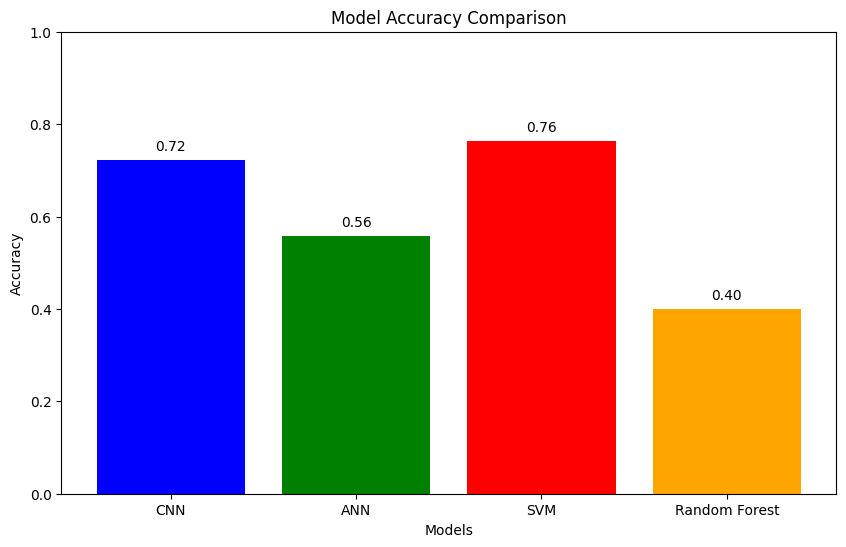

In [15]:
models_names = ['CNN', 'ANN', 'SVM', 'Random Forest']
accuracies = [cnn_acc, ann_acc, svm_acc, rf_acc]

plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()